In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry
import shapely
import rasterio
import rioxarray
from rasterio.features import shapes
from shapely.geometry import shape
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
weight = [
    0.222, #landuse
    0.060, #slope
    0.030, #elevation
    0.139, #d to settlement
    0.445, #d to wetland
    0.027, #prox to road
    0.013, #prox to sub
    0.064 #Area feedstock
    ]
print(sum(weight))


1.0000000000000002


In [3]:
xr_final_SI = xr.open_dataset('Output\\xr_SI_Landcover.nc')
xr_final_SI = xr_final_SI.drop_vars('lccs_class')
xr_final_SI = xr_final_SI.drop_vars('SI_Wind')
xr_final_SI = xr_final_SI.drop_vars('SI_Solar')
xr_final_SI = xr_final_SI.drop_vars('aux')

xr_final_SI['SI_BGEC'] = 0.0
xr_final_SI['SI_Biomass'] = 0.0
xr_final_SI['SI_BGWW'] = 0.0
xr_final_SI['SI_MSW'] = 0.0
xr_final_SI['SI_IEW'] = 0.0
xr_final_SI['AVA_BGEC'] = 0.0
xr_final_SI['AVA_Biomass'] = 0.0
xr_final_SI['AVA_BGWW'] = 0.0
xr_final_SI['AVA_MSW'] = 0.0
xr_final_SI['AVA_IEW'] = 0.0


print(xr_final_SI)
check_weight = 0


<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC      float64 0.0
    SI_Biomass   float64 0.0
    SI_BGWW      float64 0.0
    SI_MSW       float64 0.0
    SI_IEW       float64 0.0
    AVA_BGEC     float64 0.0
    AVA_Biomass  float64 0.0
    AVA_BGWW     float64 0.0
    AVA_MSW      float64 0.0
    AVA_IEW      float64 0.0


In [4]:
xr_landuse_suitability_index = xr.open_dataset('Output\\xr_SI_Landcover.nc')

xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_landuse_suitability_index['SI_BGEC'] * weight[0])
xr_final_SI['AVA_BGEC'] = xr.where(xr_landuse_suitability_index['SI_BGEC'] > 0 ,0.09,0)

xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_landuse_suitability_index['SI_Biomass'] * weight[0])
xr_final_SI['AVA_Biomass'] = xr.where(xr_landuse_suitability_index['SI_Biomass'] > 0 ,0.09,0)

xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_landuse_suitability_index['SI_BGWW'] * weight[0])
xr_final_SI['AVA_BGWW'] = xr.where(xr_landuse_suitability_index['SI_BGWW'] > 0 ,0.09,0)

xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_landuse_suitability_index['SI_MSW'] * weight[0])
xr_final_SI['AVA_MSW'] = xr.where(xr_landuse_suitability_index['SI_MSW'] > 0 ,0.09,0)

xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_landuse_suitability_index['SI_IEW'] * weight[0])
xr_final_SI['AVA_IEW'] = xr.where(xr_landuse_suitability_index['SI_IEW'] > 0 ,0.09,0)

print(xr_final_SI)

check_weight = check_weight + weight[0]
print("Check w = ",check_weight)

print("AVA_BGEC = ",xr_final_SI['AVA_BGEC'].sum())
print("AVA_Biomass = ",xr_final_SI['AVA_Biomass'].sum())
print("AVA_BGWW = ",xr_final_SI['AVA_BGWW'].sum())
print("AVA_MSW = ",xr_final_SI['AVA_MSW'].sum())
print("AVA_IEW = ",xr_final_SI['AVA_IEW'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_IEW      (lat, lon) float64 0.0 

In [5]:
xr_cal = xr.open_dataset('Output\\xr_SI_Slope.nc')

xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight[1])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight[1])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight[1])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight[1])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight[1])

print(xr_final_SI)

check_weight = check_weight + weight[1]
print("Check w = ",check_weight)
print("AVA_BGEC = ",xr_final_SI['AVA_BGEC'].sum())
print("AVA_Biomass = ",xr_final_SI['AVA_Biomass'].sum())
print("AVA_BGWW = ",xr_final_SI['AVA_BGWW'].sum())
print("AVA_MSW = ",xr_final_SI['AVA_MSW'].sum())
print("AVA_IEW = ",xr_final_SI['AVA_IEW'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_IEW      (lat, lon) float64 0.0 

In [6]:
xr_cal = xr.open_dataset('Output\\xr_SI_Elevation.nc')

xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight[2])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight[2])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight[2])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight[2])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight[2])

print(xr_final_SI)

check_weight = check_weight + weight[2]
print("Check w = ",check_weight)
print("AVA_BGEC = ",xr_final_SI['AVA_BGEC'].sum())
print("AVA_Biomass = ",xr_final_SI['AVA_Biomass'].sum())
print("AVA_BGWW = ",xr_final_SI['AVA_BGWW'].sum())
print("AVA_MSW = ",xr_final_SI['AVA_MSW'].sum())
print("AVA_IEW = ",xr_final_SI['AVA_IEW'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_IEW      (lat, lon) float64 0.0 

In [7]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosettlementarea.nc')

xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight[3])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight[3])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight[3])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight[3])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight[3])

print(xr_final_SI)

check_weight = check_weight + weight[3]
print("Check w = ",check_weight)
print("AVA_BGEC = ",xr_final_SI['AVA_BGEC'].sum())
print("AVA_Biomass = ",xr_final_SI['AVA_Biomass'].sum())
print("AVA_BGWW = ",xr_final_SI['AVA_BGWW'].sum())
print("AVA_MSW = ",xr_final_SI['AVA_MSW'].sum())
print("AVA_IEW = ",xr_final_SI['AVA_IEW'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_IEW      (lat, lon) float64 0.0 

In [8]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosettlementarea.nc')

xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight[4])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight[4])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight[4])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight[4])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight[4])

xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

print(xr_final_SI)

check_weight = check_weight + weight[4]
print("Check w = ",check_weight)
print("AVA_BGEC = ",xr_final_SI['AVA_BGEC'].sum())
print("AVA_Biomass = ",xr_final_SI['AVA_Biomass'].sum())
print("AVA_BGWW = ",xr_final_SI['AVA_BGWW'].sum())
print("AVA_MSW = ",xr_final_SI['AVA_MSW'].sum())
print("AVA_IEW = ",xr_final_SI['AVA_IEW'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_IEW      (lat, lon) float64 0.0 

In [9]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetoroad.nc')

xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight[5])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight[5])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight[5])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight[5])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight[5])

xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

print(xr_final_SI)

check_weight = check_weight + weight[5]
print("Check w = ",check_weight)
print("AVA_BGEC = ",xr_final_SI['AVA_BGEC'].sum())
print("AVA_Biomass = ",xr_final_SI['AVA_Biomass'].sum())
print("AVA_BGWW = ",xr_final_SI['AVA_BGWW'].sum())
print("AVA_MSW = ",xr_final_SI['AVA_MSW'].sum())
print("AVA_IEW = ",xr_final_SI['AVA_IEW'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_IEW      (lat, lon) float64 0.0 

In [10]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosubstation.nc')

xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] + (xr_cal['SI_BGEC'] * weight[6])
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] + (xr_cal['SI_Biomass'] * weight[6])
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] + (xr_cal['SI_BGWW'] * weight[6])
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] + (xr_cal['SI_MSW'] * weight[6])
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] + (xr_cal['SI_IEW'] * weight[6])

xr_final_SI['AVA_BGEC'] = xr.where(xr_cal['SI_BGEC'] == 0 ,0,xr_final_SI['AVA_BGEC'])
xr_final_SI['AVA_Biomass'] = xr.where(xr_cal['SI_Biomass'] == 0 ,0,xr_final_SI['AVA_Biomass'])
xr_final_SI['AVA_BGWW'] = xr.where(xr_cal['SI_BGWW'] == 0 ,0,xr_final_SI['AVA_BGWW'])
xr_final_SI['AVA_MSW'] = xr.where(xr_cal['SI_MSW'] == 0 ,0,xr_final_SI['AVA_MSW'])
xr_final_SI['AVA_IEW'] = xr.where(xr_cal['SI_IEW'] == 0 ,0,xr_final_SI['AVA_IEW'])

print(xr_final_SI)

check_weight = check_weight + weight[6]
print("Check w = ",check_weight)
print("AVA_BGEC = ",xr_final_SI['AVA_BGEC'].sum())
print("AVA_Biomass = ",xr_final_SI['AVA_Biomass'].sum())
print("AVA_BGWW = ",xr_final_SI['AVA_BGWW'].sum())
print("AVA_MSW = ",xr_final_SI['AVA_MSW'].sum())
print("AVA_IEW = ",xr_final_SI['AVA_IEW'].sum())

<xarray.Dataset>
Dimensions:      (lat: 5346, lon: 2985)
Coordinates:
  * lat          (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon          (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_IEW      (lat, lon) float64 0.0 

In [11]:
xr_final_SI.to_netcdf(path='Output_Feedstock\\xr_before_areafeedstockcal.nc')

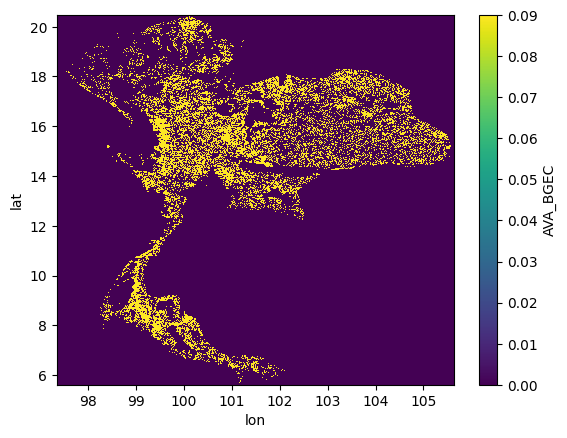

In [12]:
xr_final_SI['AVA_BGEC'].plot()

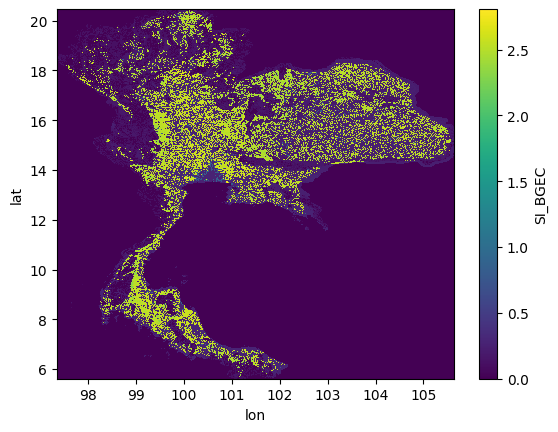

In [13]:
xr_final_SI['SI_BGEC'].plot()